<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 2

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: A Tiny Linear Regression Problem

### Problem 1.1 (Exam Style)

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

### Problem 1.4

## Part 2: General Univariate Linear Regression 

### Problem 2.1 (Exam Style)

## Part 3: Automatic Differentiation 

In [48]:
from autograd import numpy as anp
from autograd import elementwise_grad as grad

In [68]:
def bumps(z):
    assert len(z) == 2, 'input must be 2D'
    u, v = z[0], z[1]
    a = (4 - 2.1 * u ** 2 + (u ** 4) / 3) * u ** 2
    b = u * v
    c = (-4 + 4 * v ** 2) * v ** 2
    return a + b + c


In [77]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='fall24', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [78]:
retrieve('helpers.py')

Using previously downloaded file helpers.py


In [79]:
from helpers import fixed_axis_figure
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 3.1

In [125]:
import numpy as snp

n = 301
xx, yy = snp.linspace(x_min, x_max, n), snp.linspace(y_min, y_max, n)
x = snp.array(snp.meshgrid(xx, yy))

y = bumps(x)
g = grad(bumps)

step = 10
s = x[:, ::step, ::step]
derivative = g(s)

margin = 0.25
quiver_box = snp.array([x_min, x_max, y_min, y_max])
quiver_box[2:] = quiver_box[2:] + margin

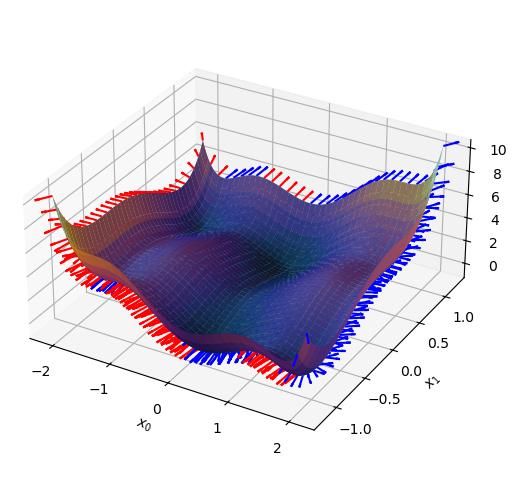

In [126]:
from matplotlib import colors as mcolors

fig = plt.figure(figsize=(6, 5), tight_layout=True)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x[0], x[1], y)
ax.set_box_aspect((1, 1, 0.5))
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$');

ax.plot_surface(x[0], x[1], y, alpha=0.5, rstride=10, cstride=10, cmap='inferno')

derivative_h = bumps(s)

colors = snp.where(gradient[0] > 0, 'blue', 'red')

for i in range(s[0].shape[0]):
    for j in range(s[0].shape[1]):
        color = colors[i, j]
        rgba_color = mcolors.to_rgba(color) 
        ax.quiver(
            s[0][i, j], s[1][i, j], derivative_h[i,j], 
            gradient[0][i, j], gradient[1][i, j], 0, 
            length=0.2, color=rgba_color, normalize=True
        )


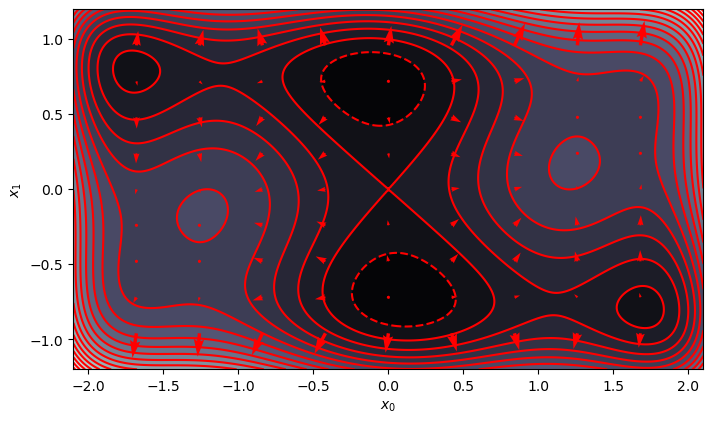

In [130]:
margin, levels = 0.25, 20
box = snp.array([x_min, x_max, y_min, y_max])

ax = fixed_axis_figure(box, scale=1.5)[1]
c = ax.contourf(x[0], x[1], y, levels=levels, cmap=plt.cm.bone)

step = 30
s = x[:, ::step, ::step]
derivative = g(s)

ax.quiver(s[0], s[1], derivative[0], derivative[1], color='r', angles='xy', scale_units='xy', scale=50)


ax.contour(c, colors='r')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$');

## Part 4: Gradient Descent 

In [138]:
from helpers import Stepper
from autograd import numpy as anp


def gradient_descent(
    f, z, alpha, min_step=1.e-6, max_iter=10000, history=False, **kwargs
):
    step = Stepper(f, z, alpha, history=history, **kwargs)
    z, fz, gz = anp.copy(z), step.fz0, step.gz0
    for k in range(max_iter):
        s, z, fz, gz = step(z, **kwargs)
        if anp.linalg.norm(s) < min_step:
            break
    step.show_history()
    return fz, z, k

In [139]:
alpha = 1.e-3

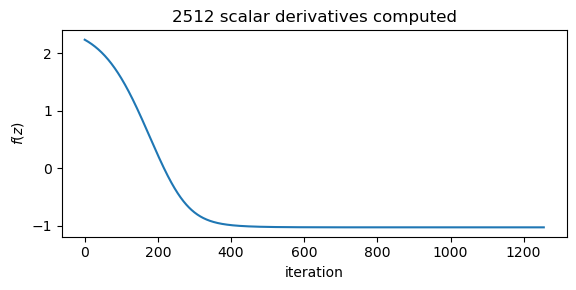

1254 iterations


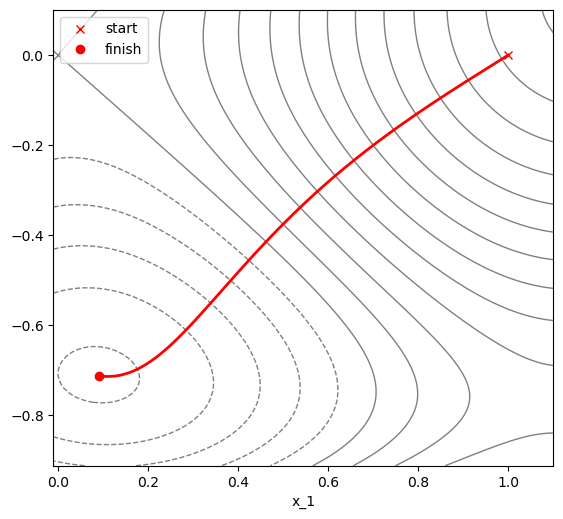

In [140]:
z0 = anp.array([1., 0.])
fz_ast, z_ast, iterations = gradient_descent(bumps, z0, alpha, history=True)
print('{} iterations'.format(iterations))

### Problem 4.1

In [133]:
v0 = anp.array((1, 1), dtype=float)

In [134]:
x = anp.array([-1, 0, 1], dtype=float)[:, None]

In [58]:
y = anp.array([0, 1, 0], dtype=float)